# Qiskit Assignment 4
## Deutsch-Jozsa 

### Learning Objectives
1. Implement the Deustch-Jozsa oracle
2. Run the DJ algorithm on a real quantum computer

### Resources
Qiskit assignments are designed to be collaborative and open internet. Where possible, links to useful documentation will be embedded within questions. You're free to discuss these tasks with TAs and peers, but do write your own solutions. For some questions, there may be additional restrictions on the ways you can solve them. To ensure compliance with course policies and assignment instructions, we reserve the right to inspect your code.

**NAME**: REPLACE WITH YOUR NAME

**STUDENT ID**: REPLACE WITH YOUR STUDENT ID

In [2]:
# Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
import pprint

#### Task 1 - Constant Oracle 

Return a Deutsch-Josza circuit from the following method stub with an oracle characterized by $f(x)=1$ for an `n`-bit input

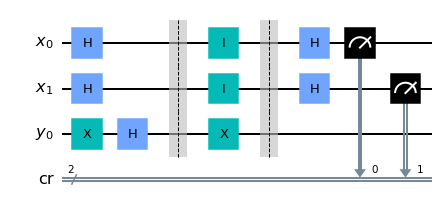

In [37]:
def dj_constant_one(n):
    # BEGIN SOLUTION
    qc = QuantumCircuit()
    qc.add_register(QuantumRegister(n, 'x'))
    qc.add_register(QuantumRegister(1, 'y'))
    qc.add_register(ClassicalRegister(n, 'cr'))

    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    qc.barrier()
    for i in range(n):
        qc.id(i)
    qc.x(n)
    qc.barrier()
    for i in range(n):
        qc.h(i)
        qc.measure(i,i)
    return qc
    # END SOLUTION
    
dj_constant_one(2).draw(output='mpl')   

In [44]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
failure_message: expected n+1 qubits and n classical bits for an n-bit input
""" # END TEST CONFIG
def test_num_bits():
    n = 8
    djco = dj_constant_one(n)
    return djco.num_clbits == n and djco.num_qubits == n+1
    
test_num_bits() == True

True

In [39]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
failure_message: something looks wrong in the number of gates/measurements used. make sure you're implementing the correct constant function
""" # END TEST CONFIG
def test_fx_equals_1():
    n=11
    ops = dj_constant_one(n).count_ops()
    h = ops['h'] == 2*n+1
    x = ops['x'] == 2
    m = ops['measure'] == n
    return h and x and m
    
test_fx_equals_1() == True

True

In [40]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
failure_message: circuit does not implement a constant oracle
""" # END TEST CONFIG
def test_constant_output():    
    qasm_sim = BasicAer.get_backend("qasm_simulator")
    job = execute(dj_constant_one(4), qasm_sim)
    counts = job.result().get_counts()
    return len(counts) == 1 and counts['0000'] == 1024
    
test_constant_output() == True

True

In [46]:
""" # BEGIN TEST CONFIG
hidden: false
points: 20
failure_message: one of the above tests is failing
""" # END TEST CONFIG

def test_num_bits():
    n = 8
    djco = dj_constant_one(n)
    return djco.num_clbits == n and djco.num_qubits == n+1

def test_fx_equals_1():
    n=11
    ops = dj_constant_one(n).count_ops()
    h = ops['h'] == 2*n+1
    x = ops['x'] == 2
    m = ops['measure'] == n
    return h and x and m

def test_constant_output():    
    qasm_sim = BasicAer.get_backend("qasm_simulator")
    job = execute(dj_constant_one(4), qasm_sim)
    counts = job.result().get_counts()
    return len(counts) == 1 and counts['0000'] == 1024

def award_credit():
    return test_fx_equals_1() and test_constant_output() and test_num_bits()

award_credit() == True

True

#### Task 2 - Balanced Oracle
Return a Deutsch-Josza circuit from the following method stub with an oracle characterized by $f(x)=x$ for an `n`-bit input

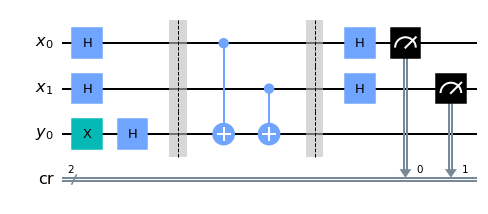

In [56]:
def dj_balanced(n):
    # BEGIN SOLUTION
    qc = QuantumCircuit()
    qc.add_register(QuantumRegister(n, 'x'))
    qc.add_register(QuantumRegister(1, 'y'))
    qc.add_register(ClassicalRegister(n, 'cr'))

    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    qc.barrier()
    for i in range(n):
        qc.cx(i,n)
    qc.barrier()
    for i in range(n):
        qc.h(i)
        qc.measure(i,i)
    return qc
    # END SOLUTION
    
dj_balanced(2).draw(output='mpl')   

In [57]:
""" # BEGIN TEST CONFIG
hidden: false
points: 0
failure_message: circuit does not implement a constant oracle
""" # END TEST CONFIG
def test_balanced_output():    
    qasm_sim = BasicAer.get_backend("qasm_simulator")
    job = execute(dj_balanced(4), qasm_sim)
    counts = job.result().get_counts()
    print(counts)
#     return len(counts) == 1 and counts['0000'] == 1024
    
test_balanced_output()

{'1111': 1024}


In [53]:
square(3)== 9

NameError: name 'square' is not defined

#### Task 3 - Running on IBMQ
Task instructions go here...

In [ ]:
def square(x):
    # BEGIN SOLUTION
    y = x*x
    return y
    # END SOLUTION

In [ ]:
square(5) == 25

In [ ]:
square(3)== 9

#### Task 4 - Analysis
Task instructions go here...

This text will be automatically replaced by otter with a cell for students to fill in.